In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.colors
from xmitgcm import open_mdsdataset
from scipy.interpolate import griddata
from scipy import interpolate
%matplotlib inline

In [3]:
def write_field(fname, data):
    print('wrote to file: ' + fname)
    fid = open(fname, "wb")
    data.tofile(fid)
    fid.close()

In [7]:
xx1 = np.linspace(0, 210, 216)
yy1 = np.linspace(-70, 70, 144)

xx2 = np.linspace(0, 210, 2160)
yy2 = np.linspace(-70, 70, 1440)

xa, ya = np.meshgrid(xx1, yy1)
xb, yb = np.meshgrid(xx2, yy2)

### Bathy

In [48]:
fn = '/WORK/sio_goc03/MITgcm_c65j/verification/moc/crun/bathyCOA.bin'
data = np.fromfile(fn, dtype='>f4')
dep = np.reshape(data, (144, 216))

dep2 = griddata((xa.flatten(), ya.flatten()), dep.flatten(), (xb, yb), method='nearest')

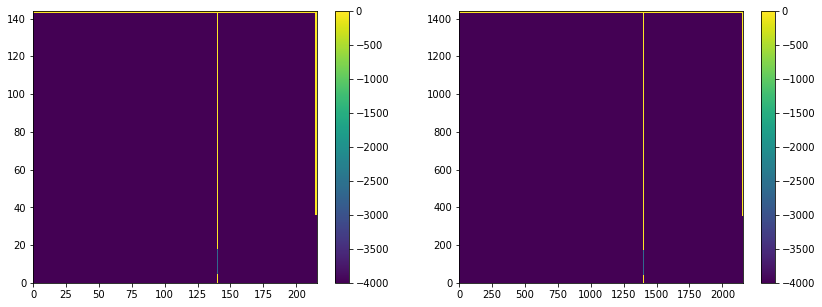

In [49]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.pcolormesh(dep[:, :])
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(dep2[:, :])
plt.colorbar()

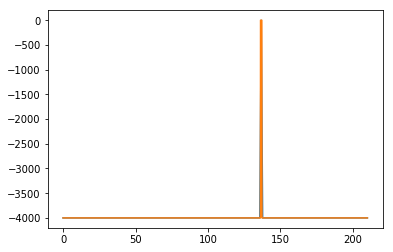

In [50]:
plt.plot(xa[20, :], dep[20, :])
plt.plot(xb[200, :], dep2[200, :])

In [51]:
dep2= dep2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/bathy_new.bin'
write_field(out_filename, dep2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/bathy_new.bin


### Wind

In [52]:
fn = '/WORK/sio_goc03/MITgcm_c65j/verification/moc/crun/taux.bin'
data = np.fromfile(fn, dtype='>f4')
wind = np.reshape(data, (144, 216))

wind2 = griddata((xa.flatten(), ya.flatten()), wind.flatten(), (xb, yb), method='nearest')

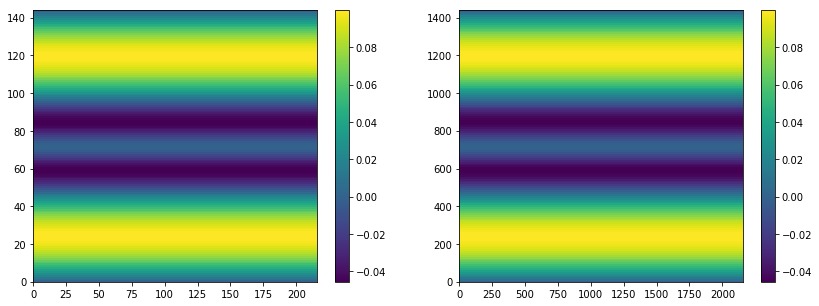

In [53]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.pcolormesh(wind)
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(wind2)
plt.colorbar()

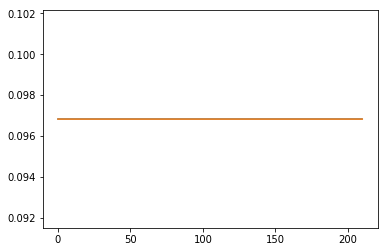

In [54]:
plt.plot(xa[20, :], wind[20, :])
plt.plot(xb[200, :], wind2[200, :])

In [55]:
wind2 = wind2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/taux_new.bin'
write_field(out_filename, wind2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/taux_new.bin


### Sflux

In [56]:
fn = '/WORK/sio_goc03/MITgcm_c65j/verification/moc/crun/sfluxPOL2.bin'
data = np.fromfile(fn, dtype='>f4')
sflux = np.reshape(data, (144, 216))

sflux2 = griddata((xa.flatten(), ya.flatten()), sflux.flatten(), (xb, yb), method='nearest')

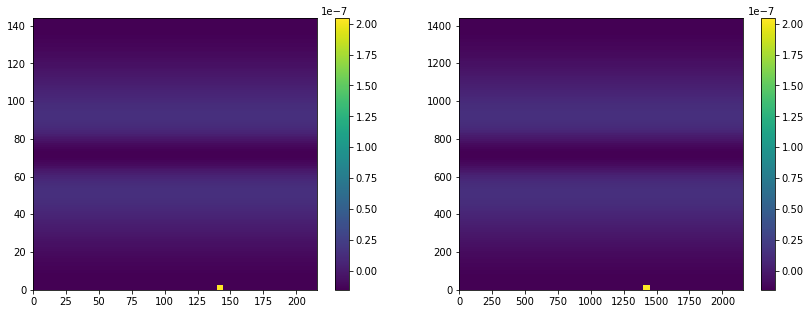

In [57]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.pcolormesh(sflux)
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(sflux2)
plt.colorbar()

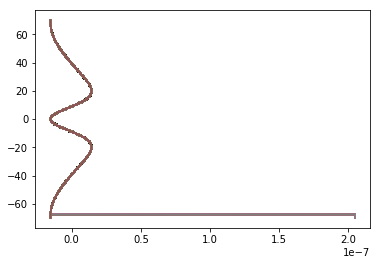

In [58]:
plt.plot(sflux, ya);
plt.plot(sflux2, yb);

In [59]:
sflux2 = sflux2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/sflux_new.bin'
write_field(out_filename, sflux2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/sflux_new.bin


### SST

In [60]:
fn = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun/sstPOL.bin'
data = np.fromfile(fn, dtype='>f4')
sst = np.reshape(data, (144, 216))

sst2 = griddata((xa.flatten(), ya.flatten()), sst.flatten(), (xb, yb), method='nearest')

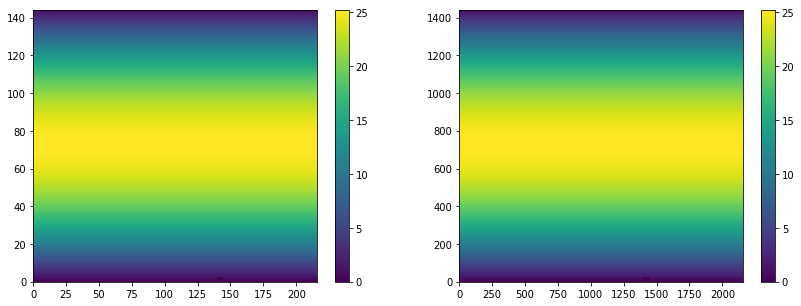

In [61]:
fig = plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.pcolormesh(sst)
plt.colorbar()

plt.subplot(122)
plt.pcolormesh(sst2)
plt.colorbar()

In [62]:
sst2 = sst2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/sstPOL_new.bin'
write_field(out_filename, sst2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/sstPOL_new.bin


### SSH, T, S, U, V

In [67]:
data_dir = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun/'

ds = open_mdsdataset(data_dir,prefix={'T', 'Eta', 'V', 'U', 'S'}).chunk()
ds

<xarray.Dataset>
Dimensions:               (XC: 216, XG: 216, YC: 144, YG: 144, Z: 32, Zl: 32, Zp1: 33, Zu: 32, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35, time: 2)
Coordinates:
  * YG                    (YG) >f4 -70.0 -69.0278 -68.0556 ... 68.0524 69.0246
  * XC                    (XC) >f4 0.4861 1.4583 2.4305 ... 208.5369 209.5091
  * XG                    (XG) >f4 0.0 0.9722 1.9444 ... 208.0508 209.023
  * YC                    (YC) >f4 -69.5139 -68.5417 ... 68.5385 69.5107
  * Zp1                   (Zp1) >f4 0.0 -13.593449 ... -3714.0034 -4000.0723
  * Z                     (Z) >f4 -6.7967243 -21.3834 ... -3572.361 -3857.0378
  * Zu                    (Zu) >f4 -13.593449 -29.173353 ... -4000.0723
  * Zl                    (Zl) >f4 0.0 -13.593449 ... -3430.7188 -3714.0034
    dyC                   (YG, XC) >f4 dask.array<shape=(144, 216), chunksize=(144, 216)>
    dyG                   (YC, XG) >f4 dask.array<shape=(144, 216), chunksize=(144, 216)>
    De

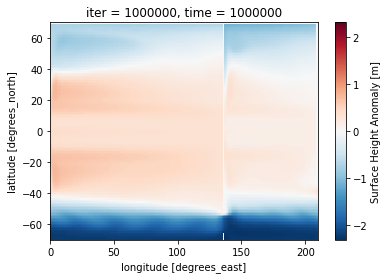

In [77]:
ssh = ds['Eta'][-1, :, :]
ssh.plot()

In [95]:
tt = ds['T'][-1, :, :, :]

In [96]:
ss = ds['S'][-1, :, :, :]

In [84]:
uu = ds['U'][-1, :, :, :]

In [85]:
vv = ds['V'][-1, :, :, :]

In [80]:
datatmp = ssh.values
ssh2 = griddata((xa.flatten(), ya.flatten()), datatmp.flatten(), (xb, yb), method='nearest')

ssh2 = ssh2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/ssh_new.bin'
write_field(out_filename, ssh2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/ssh_new.bin


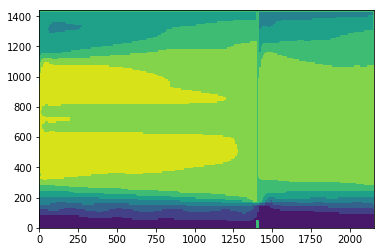

In [79]:
plt.contourf(ssh2)

In [107]:
tt2 = np.zeros((32, 1440, 2160))

for k in np.arange(32):
    datatmp = tt[k, :, :].values
    tt2[k, :, :] = griddata((xa.flatten(), ya.flatten()), datatmp.flatten(), (xb, yb), method='nearest')

tt2 = tt2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/temp_new.bin'
write_field(out_filename, tt2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/temp_new.bin


In [108]:
ss2 = np.zeros((32, 1440, 2160))

for k in np.arange(32):
    datatmp = ss[k, :, :].values
    ss2[k, :, :] = griddata((xa.flatten(), ya.flatten()), datatmp.flatten(), (xb, yb), method='nearest')

ss2 = ss2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/salt_new.bin'
write_field(out_filename, ss2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/salt_new.bin


In [109]:
uu2 = np.zeros((32, 1440, 2160))

for k in np.arange(32):
    datatmp = uu[k, :, :].values
    uu2[k, :, :] = griddata((xa.flatten(), ya.flatten()), datatmp.flatten(), (xb, yb), method='nearest')

uu2 = uu2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/uu_new.bin'
write_field(out_filename, uu2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/uu_new.bin


In [110]:
vv2 = np.zeros((32, 1440, 2160))

for k in np.arange(32):
    datatmp = vv[k, :, :].values
    vv2[k, :, :] = griddata((xa.flatten(), ya.flatten()), datatmp.flatten(), (xb, yb), method='nearest')

vv2 = vv2.astype('>f4')
out_filename = '/WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/vv_new.bin'
write_field(out_filename, vv2)

wrote to file: /WORK/sio_goc03/model/MITgcm/mycases/moc/crun_0.1/vv_new.bin


In [102]:
ss2.shape

(29, 1440, 2160)

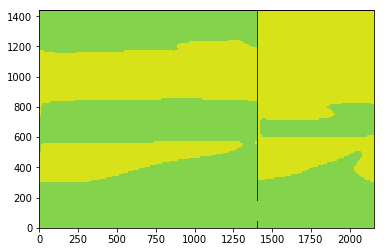

In [99]:
plt.contourf(ss2[0, :, :])